In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.interpolate import interp1d

/Users/snirlugassy/miniconda3/envs/deep/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_data_path = './data/train'
train_files = os.listdir(train_data_path)

In [9]:
data = []
for f in train_files[:10]:
    data.append(pd.read_csv(os.path.join(train_data_path, f), sep='|'))
data[0].head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,1,0
1,92.0,NaN,36.6,147.0,109.0,97.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,2,0
2,91.0,97.0,NaN,139.0,94.0,82.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,3,0
3,96.0,NaN,NaN,129.0,99.0,94.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,4,0
4,94.0,NaN,36.8,144.0,101.0,88.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,5,0
5,96.0,NaN,NaN,136.0,100.0,87.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,6,0
6,100.0,NaN,NaN,142.0,102.0,91.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,7,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,8,0
8,96.0,95.0,37.0,137.0,103.0,94.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,9,0
9,93.0,97.0,NaN,129.0,67.0,47.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,10,0


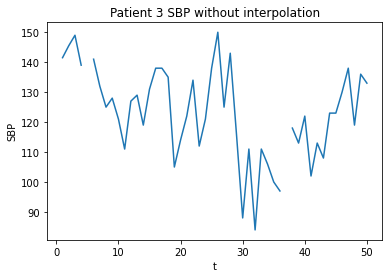

In [22]:
plt.figure()
plt.title('Patient 3 SBP without interpolation')
plt.ylabel('SBP')
plt.xlabel('t')
data[2].SBP.plot()
plt.show()

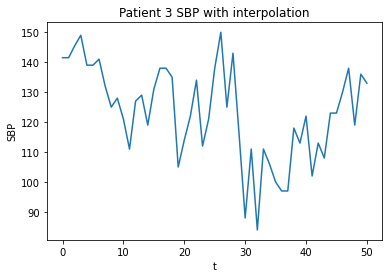

In [21]:
_x = data[2].SBP[~data[2].SBP.isna()]
interp = interp1d(_x.index, _x.values, fill_value='extrapolate', kind='nearest')
pat3SBP_interp = interp(data[2].SBP.index)
plt.figure()
plt.title('Patient 3 SBP with interpolation')
plt.plot(pat3SBP_interp)
plt.ylabel('SBP')
plt.xlabel('t')
plt.show()

In [5]:
data[0].Temp.interpolate(method='akima', fill_value='extrapolate')

0           NaN
1           NaN
2     36.400000
3     37.005271
4     37.494447
5     37.836400
6     38.000000
7     38.032306
8     38.006566
9     37.930935
10    37.813567
11    37.662616
12    37.486237
13    37.292585
14    37.089813
15    36.886077
16    36.689531
17    36.508329
18    36.350626
19    36.224576
20    36.138334
21    36.100055
22    36.117892
23    36.200000
24    36.341118
25    36.509353
26    36.672912
27    36.800000
28    36.894819
29    36.979596
30    37.049575
31    37.100000
32    37.124656
33    37.123108
34    37.099271
35    37.057063
36    37.000397
37    36.933189
38    36.859356
39    36.782811
40    36.707471
41    36.637252
42    36.576068
43    36.527836
44    36.496470
45    36.485886
46    36.500000
47    36.554838
48    36.660134
49    36.810363
50    37.000000
51          NaN
Name: Temp, dtype: float64

In [28]:
data[0].Temp.interpolate(method='nearest')

0      NaN
1      NaN
2     36.4
3     36.4
4     36.4
5     38.0
6     38.0
7     38.0
8     38.0
9     38.0
10    38.0
11    38.0
12    38.0
13    38.0
14    38.0
15    36.2
16    36.2
17    36.2
18    36.2
19    36.2
20    36.2
21    36.2
22    36.2
23    36.2
24    36.2
25    36.2
26    36.8
27    36.8
28    36.8
29    36.8
30    37.1
31    37.1
32    37.1
33    37.1
34    37.1
35    37.1
36    37.1
37    37.1
38    37.1
39    36.5
40    36.5
41    36.5
42    36.5
43    36.5
44    36.5
45    36.5
46    36.5
47    36.5
48    36.5
49    37.0
50    37.0
51     NaN
Name: Temp, dtype: float64

In [47]:
X = data[0].HR[~data[0].HR.isna()]
f = interp1d(X.index, X.values, fill_value='extrapolate')
f

In [56]:
data[0]['_HR'] = f(data[0].HR.index)
data[0]._HR == data[0].HR

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28    False
29     True
30     True
31     True
32     True
33     True
34    False
35     True
36    False
37     True
38    False
39     True
40     True
41     True
42    False
43     True
44    False
45     True
46     True
47     True
48     True
49     True
50     True
51     True
dtype: bool

In [15]:
from dataset import ICUSepsisDataset

train_data_path = '/home/student/data/train'
icu_train = ICUSepsisDataset(train_data_path)

x,y = icu_train[0]
print(x.shape, y.shape)

Found 20000 files in /home/student/data/train
torch.Size([52, 9]) torch.Size([52])
